## 0. Introduction

#### the objective is to analyze the weather data and find insights that could help predict visitation patterns at a park

#### Shayan Hodai 
#### shayan.hodai@outlook.com 
#### 14 April 2024

## 1. Get data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def load_data(x):
    if x == "weather":
        url = r"https://drive.google.com/file/d/1v2NnlXFXYKLhB9ySkXTd1PwKtHu7XXLj/view?usp=drive_link"
        path='https://drive.google.com/uc?id=' + url.split('/')[-2]
        return pd.read_csv(path)
    elif x == "visitation":
        url = r"https://drive.google.com/file/d/1YUojYPP9wXyG5F2RA1EL4HW6do7ifHLn/view?usp=drive_link"
        path='https://drive.google.com/uc?id=' + url.split('/')[-2]
        return pd.read_csv(path)
    else:
        return "url is not valid!"

## 2. Explore data

### 2.1 Datasets information and types 

In [2]:
w = load_data("weather")
w.head()

,DATE_CALENDAR,CLOUD_BASE_HEIGHT_24HR_DEP,CLOUD_BASE_HEIGHT_AVG,CLOUD_BASE_HEIGHT_MAX,CLOUD_BASE_HEIGHT_MIN,CLOUD_COVER_24HR_DEP,CLOUD_COVER_AVG,CLOUD_COVER_MAX,CLOUD_COVER_MIN,CLOUD_COVER_PERC_24HR_DEP,...,WIND_GUST_MAX,WIND_GUST_MIN,WIND_GUST_INSTANTANEOUS_24HR_DEP,WIND_GUST_INSTANTANEOUS_AVG,WIND_GUST_INSTANTANEOUS_MAX,WIND_GUST_INSTANTANEOUS_MIN,WIND_SPEED_24HR_DEP,WIND_SPEED_AVG,WIND_SPEED_MAX,WIND_SPEED_MIN
0,2021-03-13,-1376,1063.0,1063.0,1063.0,-0.01,0.18,0.74,0.00,-1,...,11.63,4.30,-2.40,8.19,10.84,3.73,-1.51,5.11,7.44,2.27
1,2021-03-14,255,1318.0,2482.0,586.0,-0.03,0.15,0.85,0.00,-2,...,15.89,5.55,3.20,11.39,15.75,5.44,1.90,7.00,9.30,3.81
2,2021-03-15,7448,8767.0,11406.0,6184.0,0.18,0.33,1.00,0.00,18,...,10.45,5.42,-3.89,7.50,10.47,5.12,-2.68,4.32,6.52,2.04
3,2021-03-16,-6705,2061.0,5232.0,424.0,0.55,0.88,1.00,0.45,55,...,11.48,3.11,0.81,8.30,11.20,2.88,1.16,5.48,7.33,2.03
4,2021-03-17,639,2700.0,7604.0,680.0,-0.07,0.81,1.00,0.47,-7,...,6.18,2.49,-4.54,3.76,6.07,2.06,-3.43,2.05,3.03,1.30


In [3]:
w.info()
w.shape
min(w["DATE_CALENDAR"])
max(w["DATE_CALENDAR"])

# 1096 days. 3 years. from 2021-03-13 to 2024-03-12
# 167 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Columns: 167 entries, DATE_CALENDAR to WIND_SPEED_MIN
dtypes: bool(2), float64(149), int64(8), object(8)
memory usage: 1.4+ MB


'2024-03-12'

In [4]:
# for i in w.columns: print(i)

In [5]:
visitation = load_data("visitation")
visitation.head()

,DATE,ESTIMATED_VISITS
0,2021-04-01,3781
1,2021-04-02,4024
2,2021-04-03,3189
3,2021-04-04,5407
4,2021-04-05,2519


In [6]:
visitation.info()
visitation.shape
min(visitation["DATE"])
max(visitation["DATE"])

# 364 days. 1 years. from 2021-04-01 to 2022-03-31
# 1 attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DATE              364 non-null    object
 1   ESTIMATED_VISITS  364 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


'2022-03-31'

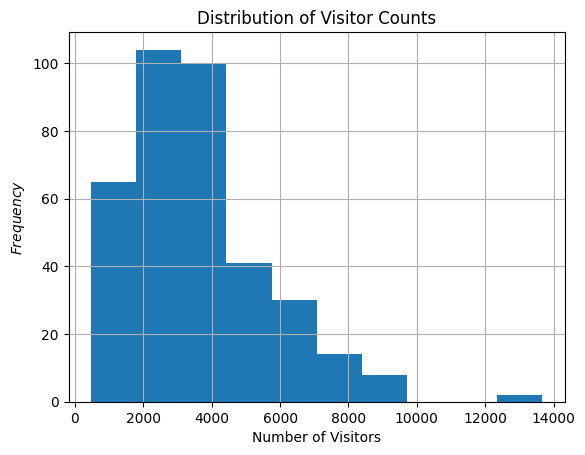

In [7]:
visitation["ESTIMATED_VISITS"].hist()
plt.title("Distribution of Visitor Counts")  
plt.xlabel("Number of Visitors")  
plt.ylabel("$Frequency$")  
plt.show()

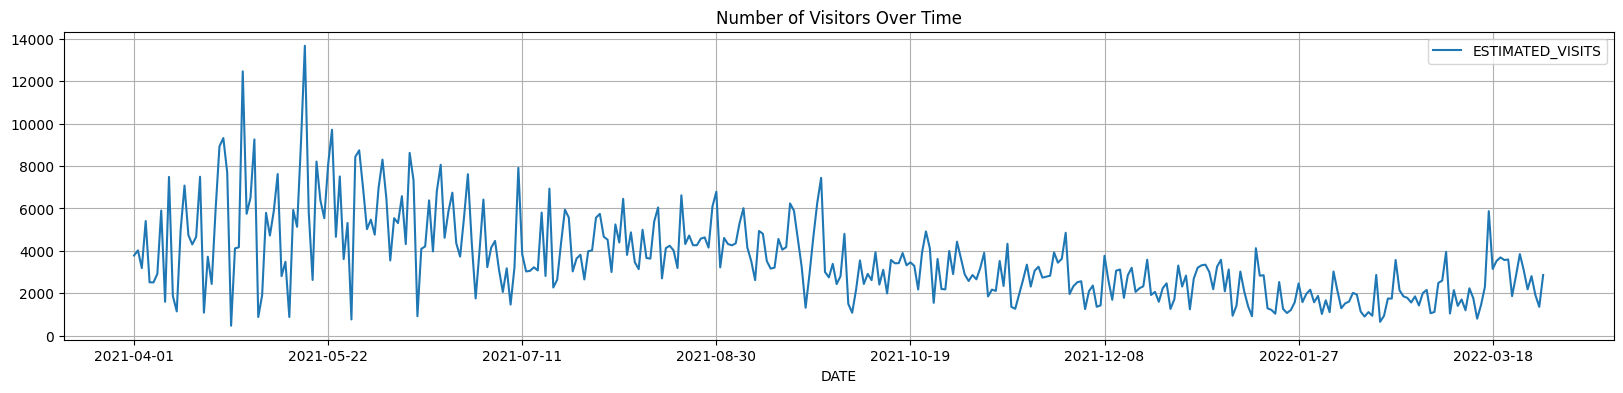

In [8]:
visitation.plot(kind = "line", x = "DATE", y = "ESTIMATED_VISITS", grid = True, figsize=(20, 4))
plt.title("Number of Visitors Over Time")  
plt.show()

### 2.2 Join datasetes

In [9]:
w.rename(columns={"DATE_CALENDAR": "DATE"}, inplace=True) # rename DATE_CALENDAR to DATE. as we want to join the weather dataset with the visitation dataset on the DATE column 
joined = pd.merge(w, visitation, on="DATE", how="left") # we've joined datasets!

In [10]:
park = joined[~joined["ESTIMATED_VISITS"].isnull()] # park dataset has weather and number of visitors for 364 days. 1 years. from 2021-04-01 to 2022-03-31
weather = joined[joined["ESTIMATED_VISITS"].isnull()] # weather dataset has only weather for 732 days. from 2021-03-13 to 2021-03-31 and from 2022-04-01 to 2024-03-12
weather = weather.drop(columns=["ESTIMATED_VISITS"])

In [11]:
# don't need the DATE column in the park dataset anymore 
days_estimated_visits = park.pop("DATE")

# don't need the DATE column in the weather dataset anymore 
days_unestimated_visits = weather.pop("DATE")

## 3. Split data to train and test sets

In [12]:
from sklearn.model_selection import train_test_split

park_train, test = train_test_split(park, test_size=0.2, random_state=42) # 80% train set and 20% test set

## 4. Explore train set in more detail

In [13]:
park = park_train.copy() # to make naming clear, park is the train set

In [14]:
park.shape
# 291 days in train set

(291, 167)

In [15]:
park.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 230 to 122
Columns: 167 entries, CLOUD_BASE_HEIGHT_24HR_DEP to ESTIMATED_VISITS
dtypes: bool(2), float64(150), int64(8), object(7)
memory usage: 378.0+ KB


## 4.1 Data processing

### 4.1.1 Handling missing values 

In [16]:
# check for NAN values in attributes
nan_counts = park.isna().sum()
nan_counts.value_counts()
# so, we have 11 attributes which have many NAN values, we can drop these columns

0      153
3        3
266      3
124      3
181      1
287      1
291      1
271      1
127      1
Name: count, dtype: int64

In [17]:
nan_columns = nan_counts[nan_counts >= 100].index.tolist()
nan_columns
# these columns will be dropped as they have so many NAN values

['PRECIPITATION_INTENSITY_MAX',
 'SNOW_DRIFTING_INTENSITY_MAX',
 'SNOW_TYPE_DESC_PREDOMINANT',
 'TEMPERATURE_HEAT_INDEX_24HR_DEP',
 'TEMPERATURE_HEAT_INDEX_AVG',
 'TEMPERATURE_HEAT_INDEX_MAX',
 'TEMPERATURE_HEAT_INDEX_MIN',
 'TEMPERATURE_WIND_CHILL_24HR_DEP',
 'TEMPERATURE_WIND_CHILL_AVG',
 'TEMPERATURE_WIND_CHILL_MAX',
 'TEMPERATURE_WIND_CHILL_MIN']

In [18]:
park.drop(columns=nan_columns, inplace=True)
park.shape
# now we gonna have 156 attributes

(291, 156)

In [19]:
# also drop PRECIPITATION_TYPE_DESC_PREDOMINANT column as it's filled with No precipitation value
park.drop(columns="PRECIPITATION_TYPE_DESC_PREDOMINANT", inplace=True)
park.shape
# now we gonna have 155 attributes

(291, 155)

In [20]:
# and there are 3 attributes which have some NAN values, I need to handle them
columns_to_impute = nan_counts[nan_counts == 3].index.tolist()
columns_to_impute

['CLOUD_BASE_HEIGHT_AVG', 'CLOUD_BASE_HEIGHT_MAX', 'CLOUD_BASE_HEIGHT_MIN']

In [21]:
# I'm gonna repalce the misssing values with the median of the attribue
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

park[columns_to_impute] = imputer.fit_transform(park[columns_to_impute])

In [22]:
park.isna().sum().value_counts()
# all good! we have 155 attributes, and none of them are NAN values

0    155
Name: count, dtype: int64

### 4.1.2 Convert categorical variables to numerical

In [23]:
# lets find categorical attributes
cat_columns = park.select_dtypes(include="object").columns.tolist() + park.select_dtypes(include="bool").columns.tolist()
cat_columns

['HAS_FREEZING_RAIN',
 'HAS_ICE',
 'HAS_RAIN',
 'HAS_SLEET',
 'HAS_PRECIPITATION',
 'HAS_SNOW']

In [24]:
# I'm gonna convert categorical values to numerical using OrdinalEncoder
columns_to_encode = cat_columns

In [25]:
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder()

park[columns_to_encode] = imputer.fit_transform(park[columns_to_encode])

In [26]:
park.info()
# great! all numerical

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 230 to 122
Columns: 155 entries, CLOUD_BASE_HEIGHT_24HR_DEP to ESTIMATED_VISITS
dtypes: float64(147), int64(8)
memory usage: 354.7 KB


### 4.1.3 Feature scaling

In [27]:
# except for previously converted categorical to numerical attributes, and the target attribute which is ESTIMATED_VISITS, I'm gonna scale other attributes using Standardization
columns_to_exclude = cat_columns + ["ESTIMATED_VISITS"]
columns_to_scale = [col for col in park.columns if col not in columns_to_exclude]

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

park[columns_to_scale] = scaler.fit_transform(park[columns_to_scale])

In [29]:
park.head()
# great! values are scaled

,CLOUD_BASE_HEIGHT_24HR_DEP,CLOUD_BASE_HEIGHT_AVG,CLOUD_BASE_HEIGHT_MAX,CLOUD_BASE_HEIGHT_MIN,CLOUD_COVER_24HR_DEP,CLOUD_COVER_AVG,CLOUD_COVER_MAX,CLOUD_COVER_MIN,CLOUD_COVER_PERC_24HR_DEP,CLOUD_COVER_PERC_AVG,...,WIND_GUST_MIN,WIND_GUST_INSTANTANEOUS_24HR_DEP,WIND_GUST_INSTANTANEOUS_AVG,WIND_GUST_INSTANTANEOUS_MAX,WIND_GUST_INSTANTANEOUS_MIN,WIND_SPEED_24HR_DEP,WIND_SPEED_AVG,WIND_SPEED_MAX,WIND_SPEED_MIN,ESTIMATED_VISITS
230,-0.329905,-0.686122,-0.578194,-0.497020,0.731821,0.431727,0.351751,-0.699567,0.743596,0.413190,...,3.184472,0.716823,1.960034,1.442105,3.218627,0.580425,2.049478,1.693521,2.786945,3993.0
359,0.509222,-0.037649,0.240894,-0.479726,1.477926,1.283999,0.351751,1.731264,1.499689,1.266220,...,-1.097157,-2.103877,-0.128203,0.280187,-1.155482,-1.940817,0.017809,0.406117,-0.749588,1051.0
319,-0.108887,-0.806660,0.244934,-0.593260,1.442397,0.780384,0.351751,0.888576,1.463685,0.800931,...,-0.235052,-0.681898,-0.551849,-0.305185,-0.282579,-0.995963,-0.807896,-0.144295,-1.108020,1577.0
95,2.146241,2.854689,1.289584,4.170649,-0.085342,-2.008869,-0.404939,-0.764389,-0.084505,-1.990802,...,-0.080933,-0.602161,0.081745,-0.243412,0.005192,-0.521089,-0.085404,-0.228256,0.415318,4211.0
104,-0.555459,0.172134,0.130134,-0.045140,1.158167,1.361478,0.351751,2.379486,1.139645,1.343768,...,0.525913,-0.279890,0.359177,0.942039,0.465624,-0.388907,0.159048,0.238195,0.152467,3730.0


## 4.2 Correlations

In [30]:
# let's measure correlations
corr_matrix = park.corr()
corr_matrix["ESTIMATED_VISITS"].sort_values(ascending=False)

ESTIMATED_VISITS             1.000000
SOLAR_RADIATION_NET_AVG      0.633213
SOLAR_RADIATION_NET_TOTAL    0.633212
SOLAR_RADIATION_NET_MAX      0.597715
SOLAR_IRRADIANCE_TOTAL       0.582521
                               ...   
SNOW_COVER_MIN                    NaN
SNOW_DEPTH_AVG                    NaN
SNOW_DEPTH_MAX                    NaN
SNOW_DEPTH_MIN                    NaN
SNOW_LWE_RATE_MIN                 NaN
Name: ESTIMATED_VISITS, Length: 155, dtype: float64

#### <span style='color:FireBrick;'> **WOW!** </span>
#### <span style='color:FireBrick;'> **Intersting findings in correlations!** </span>

#### <span style='color:FireBrick;'> some attributes are NaN values, which means those attributes are probably only zeros and don't have any effect on ESTIMATED_VISITS </span>
#### <span style='color:FireBrick;'> And, SOLAR_RADIATIONs are the most influential attribute of the number of visitors </span>

In [31]:
# lets check if NaN correlated attributes are really only zeroes
sum(park["SNOW_COVER_MIN"])
# Yes! those attribute are only zeros

0.0

In [32]:
# how many are they? 
len(corr_matrix[corr_matrix["ESTIMATED_VISITS"].isnull()].index)
# 21 attributes will be dropped

21

In [33]:
# these 21 attributes should be dropped 
(corr_matrix[corr_matrix["ESTIMATED_VISITS"].isnull()]).index.tolist()

['FREEZING_RAIN_LWE_RATE_MIN',
 'ICE_LWE_RATE_MIN',
 'INDEX_UV_MIN',
 'MINUTES_OF_SLEET_TOTAL',
 'MOISTURE_SOIL_MIN',
 'PRECIPITATION_LWE_RATE_MIN',
 'RAIN_LWE_RATE_MIN',
 'HAS_SLEET',
 'SLEET_LWE_TOTAL',
 'SLEET_LWE_RATE_AVG',
 'SLEET_LWE_RATE_MAX',
 'SLEET_LWE_RATE_MIN',
 'SNOW_MIN',
 'SNOW_COVER_24HR_DEP',
 'SNOW_COVER_AVG',
 'SNOW_COVER_MAX',
 'SNOW_COVER_MIN',
 'SNOW_DEPTH_AVG',
 'SNOW_DEPTH_MAX',
 'SNOW_DEPTH_MIN',
 'SNOW_LWE_RATE_MIN']

In [34]:
zeros_columns = (corr_matrix[corr_matrix["ESTIMATED_VISITS"].isnull()]).index.tolist()
park.drop(columns=zeros_columns, inplace=True)
park.shape
# so far we've dropped 34 attributes. (1 Date, 11 NAN attribues, 1 no information, 21 only zero values)
# now we gonna have 134 attributes

(291, 134)

In [35]:
# correlations again
corr_matrix = park.corr()
corr_matrix["ESTIMATED_VISITS"].sort_values(ascending=False)

ESTIMATED_VISITS                 1.000000
SOLAR_RADIATION_NET_AVG          0.633213
SOLAR_RADIATION_NET_TOTAL        0.633212
SOLAR_RADIATION_NET_MAX          0.597715
SOLAR_IRRADIANCE_TOTAL           0.582521
                                   ...   
SNOW_LIQUID_RATIO_KUCHERA_MAX   -0.494415
DEGREE_DAYS_HEATING             -0.494537
DEGREE_DAYS_EFFECTIVE           -0.500039
SNOW_LIQUID_RATIO_NCEP_AVG      -0.503134
SNOW_LIQUID_RATIO_NCEP_MIN      -0.511848
Name: ESTIMATED_VISITS, Length: 134, dtype: float64

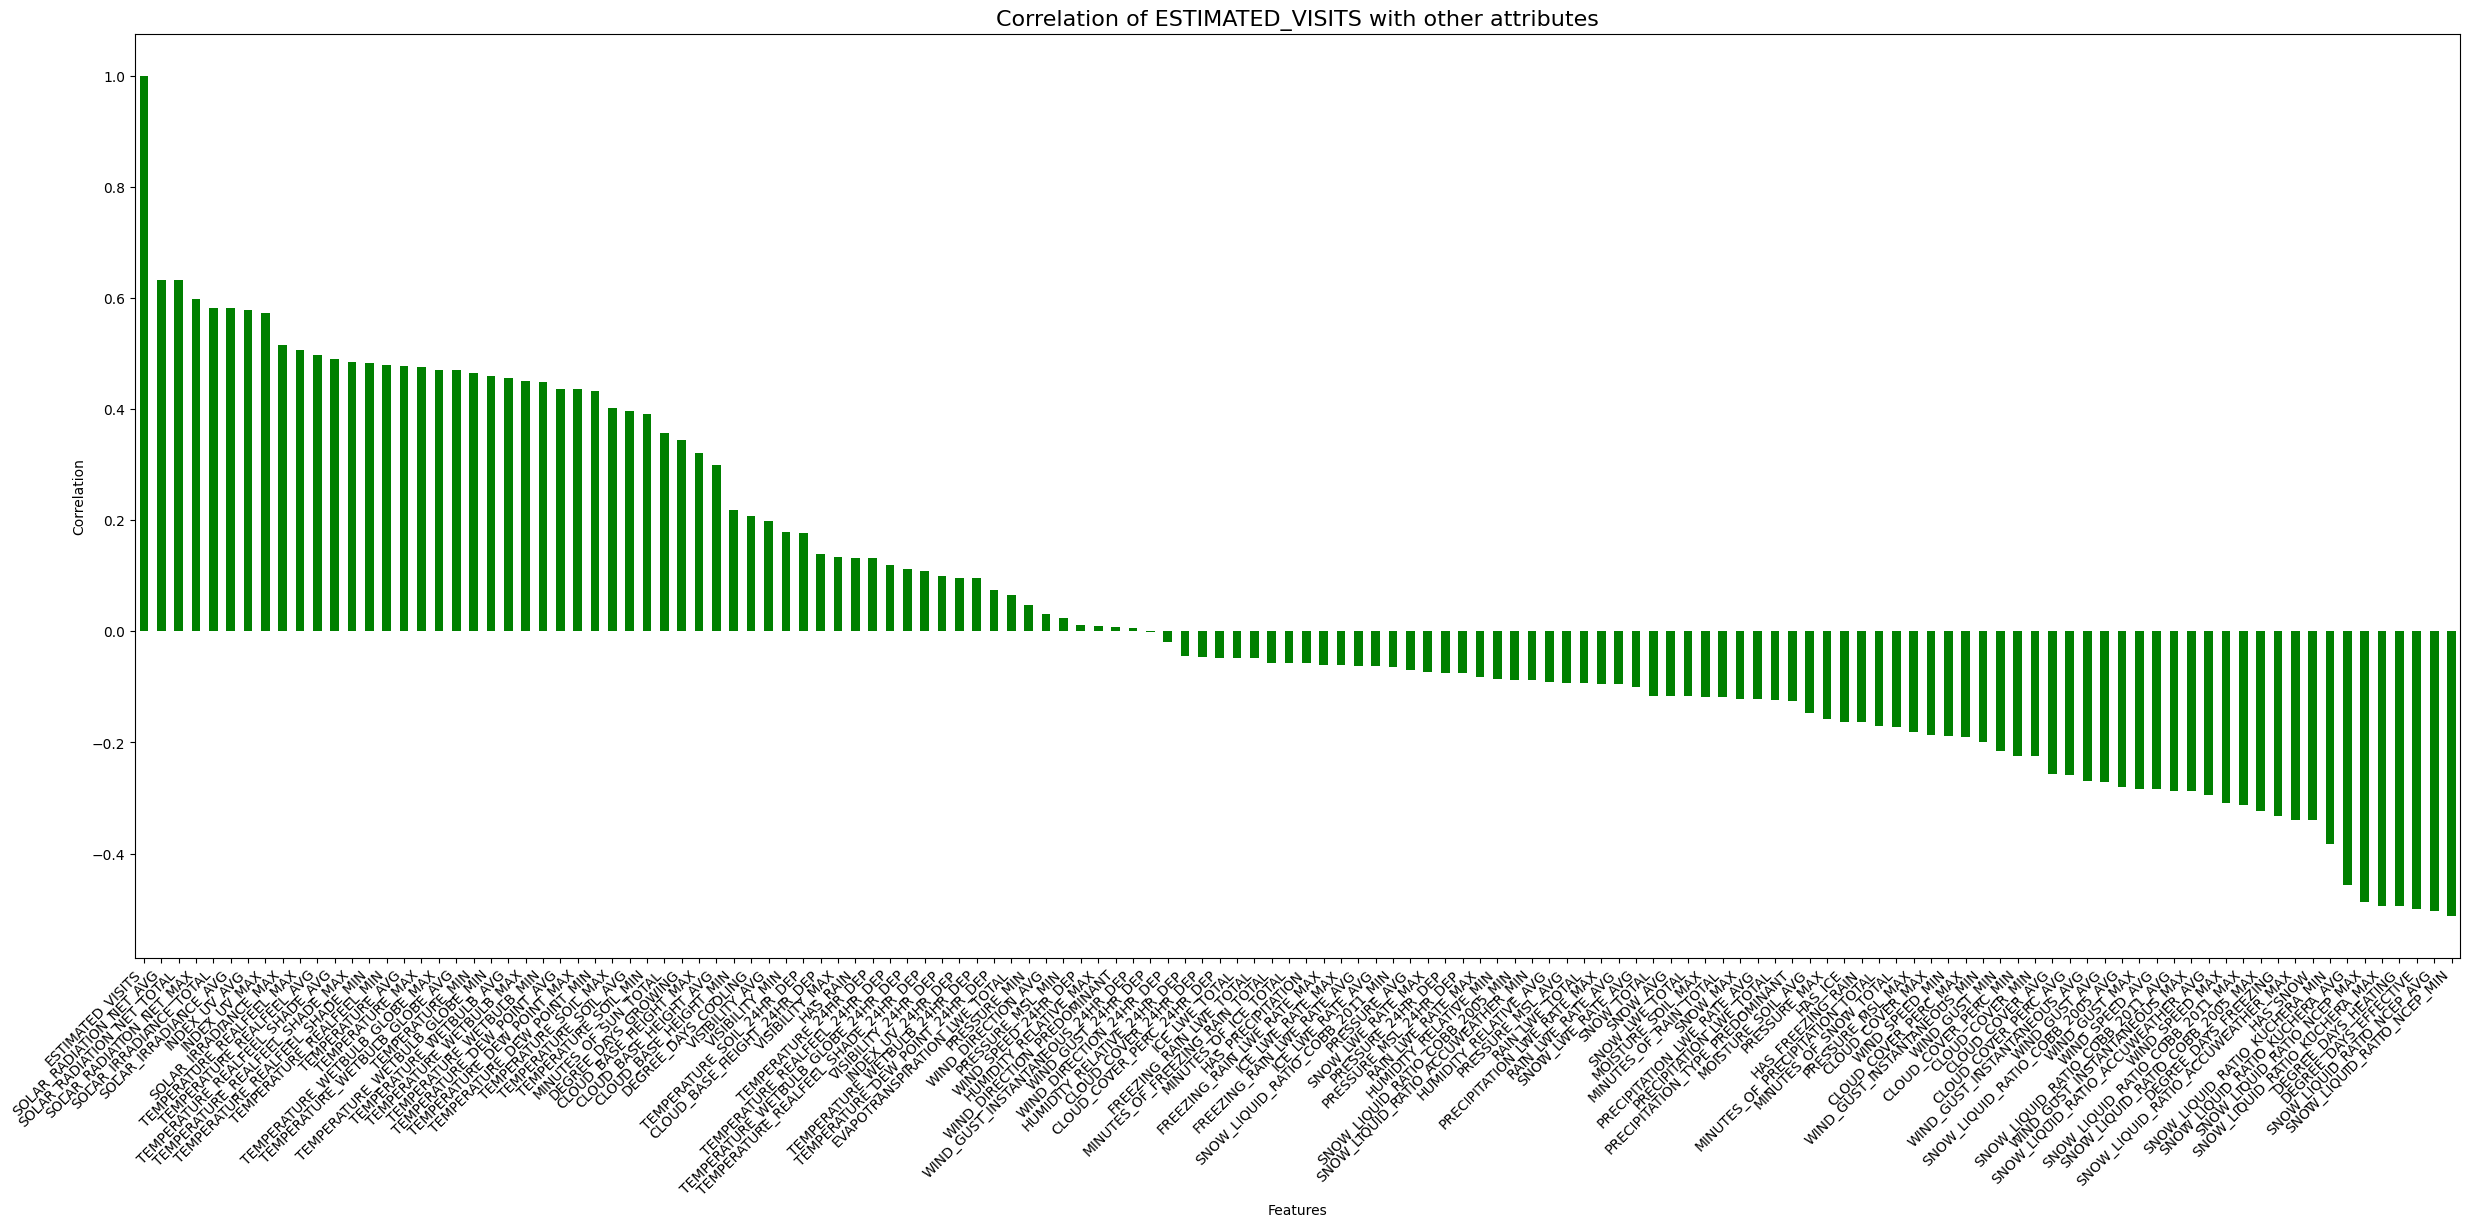

In [36]:
# Let's visualize correlations

plt.figure(figsize=(30, 12))
corr_matrix["ESTIMATED_VISITS"].sort_values(ascending=False).plot(kind="bar", color="green")
plt.title("Correlation of ESTIMATED_VISITS with other attributes", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha="right")
plt.show()

In [37]:
zero_cor_cols = corr_matrix[(corr_matrix["ESTIMATED_VISITS"] < 0.01) & (corr_matrix["ESTIMATED_VISITS"] > -0.01)].index
zero_cor_cols
# these columns should be dropped as they have almost no effect. so far we've dropped 37 attributes. (11 NAN attribues, 1 no information, 21 only zero values, 4 zero_cor)

Index(['HUMIDITY_RELATIVE_MAX', 'WIND_DIRECTION_PREDOMINANT',
       'WIND_GUST_24HR_DEP', 'WIND_GUST_INSTANTANEOUS_24HR_DEP'],
      dtype='object')

In [38]:
park.drop(columns=zero_cor_cols, inplace=True)
park.shape
# now we gonna have 130 attributes

(291, 130)

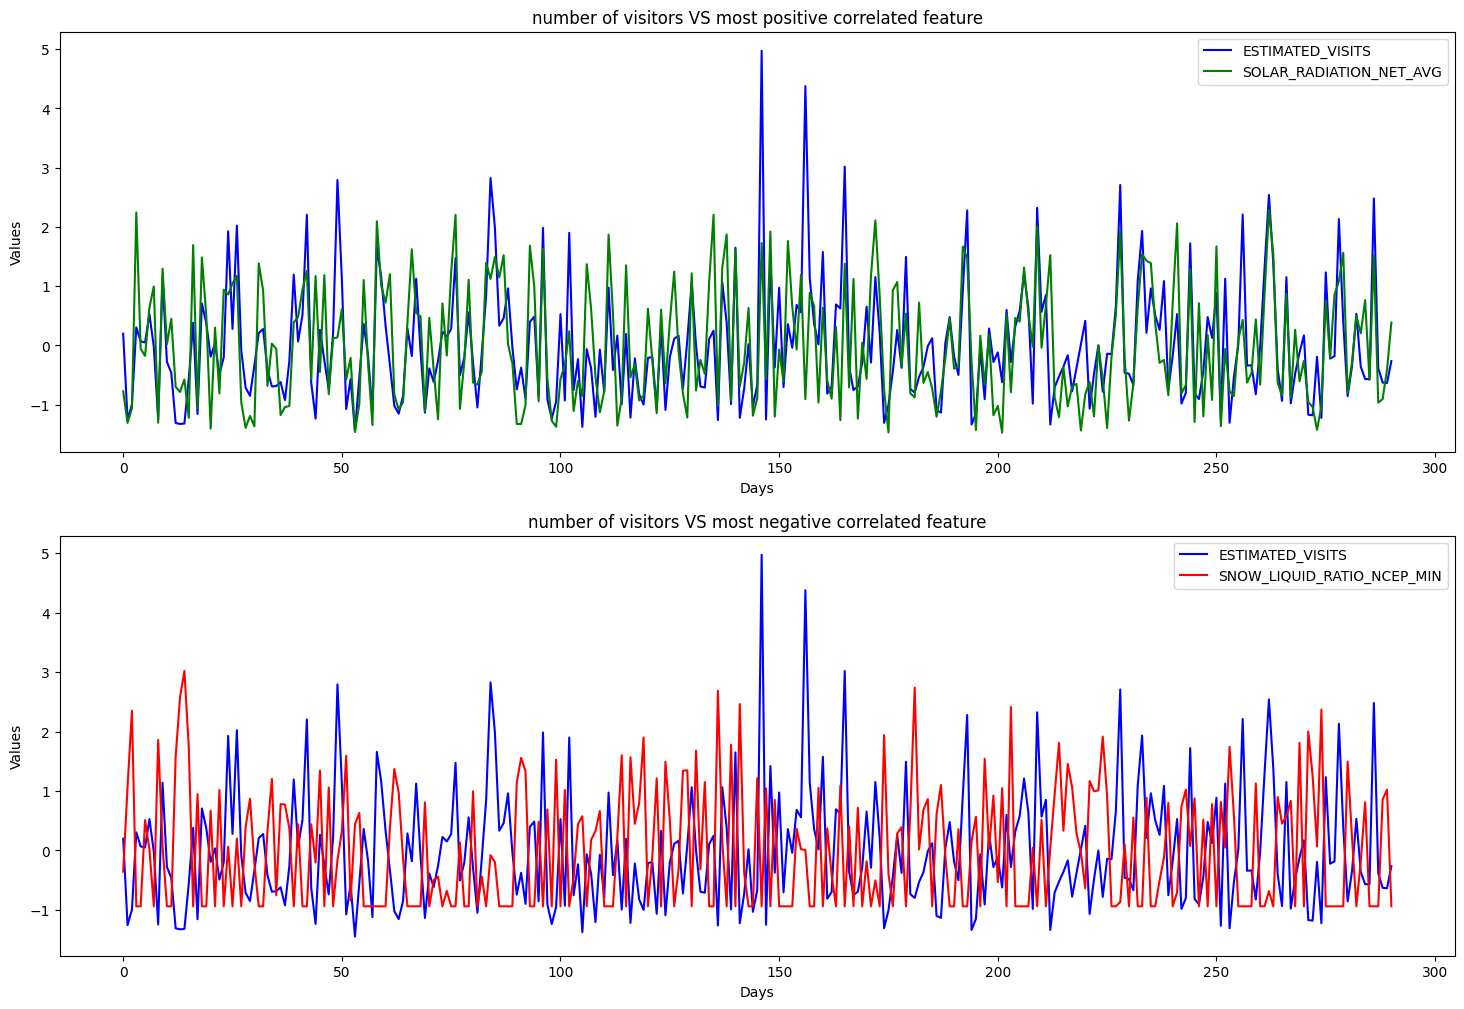

In [39]:
plt.figure(figsize=(18, 12))
xs = range(len(park.index))

visitors = park["ESTIMATED_VISITS"].copy()
scaled_visitors = scaler.fit_transform(visitors.values.reshape(-1, 1))

plt.subplot(2, 1, 1)
plt.plot(xs, scaled_visitors, color='blue', label="ESTIMATED_VISITS")
plt.plot(xs, park["SOLAR_RADIATION_NET_AVG"], color='green', label="SOLAR_RADIATION_NET_AVG")
plt.title("number of visitors VS most positive correlated feature")
plt.xlabel("Days")
plt.ylabel("Values")
plt.legend(loc="best")

plt.subplot(2, 1, 2)
plt.plot(xs, scaled_visitors, color='blue', label="ESTIMATED_VISITS")
plt.plot(xs, park["SNOW_LIQUID_RATIO_NCEP_MIN"], color='red', label="SNOW_LIQUID_RATIO_NCEP_MIN")
plt.title("number of visitors VS most negative correlated feature")
plt.xlabel("Days")
plt.ylabel("Values")
plt.legend(loc="best")

plt.show()

## 4.3 Reduce redundant dimensionality

### 4.3.1 Multicollinearity

#### <span style='color:FireBrick;'> **I need to reduce redundant dimensions to avoid building complex models and, hence, overfitting.**</span>
#### <span style='color:FireBrick;'> Here is the strategy: </span>
#### <span style='color:FireBrick;'> Finding features which are highly correlated with each other. These features are highly similar to each other, and their effect on target value is almost equal. </span>
#### <span style='color:FireBrick;'> Among these similar features, I keep only one of them which has the greatest absolute value correlation with target value.  </span>

In [40]:
corr_matrix = park.corr()
features_corr = corr_matrix.iloc[:-1, :-1]
target_corr = corr_matrix["ESTIMATED_VISITS"]

high_corrs = set()
for feature in features_corr.columns:  # finding features which are highly correlated with the current feature
    cols = features_corr.index[abs(features_corr[feature]) > 0.8]
    for col in cols:
        if col != feature and col not in high_corrs:
            high_corrs.add(col)
            
high_corrs = list(high_corrs)
high_corrs.sort()

high_corrs_dict = {} # this dictionary would have features which are highly similar, and the correlation of each of them with the target value (ESTIMATED_VISITS)

for feature in high_corrs:
    high_corrs_dict[feature] = target_corr[feature]

In [41]:
high_corrs_dict

{'CLOUD_COVER_24HR_DEP': -0.04676150706092899,
 'CLOUD_COVER_AVG': -0.2568085950262635,
 'CLOUD_COVER_MAX': -0.1872607785342945,
 'CLOUD_COVER_MIN': -0.22501440036230733,
 'CLOUD_COVER_PERC_24HR_DEP': -0.04738665834242774,
 'CLOUD_COVER_PERC_AVG': -0.25780903948181877,
 'CLOUD_COVER_PERC_MAX': -0.1895117621492904,
 'CLOUD_COVER_PERC_MIN': -0.2245758729657388,
 'DEGREE_DAYS_COOLING': 0.20696629863479396,
 'DEGREE_DAYS_EFFECTIVE': -0.5000394477035831,
 'DEGREE_DAYS_FREEZING': -0.33187052553537205,
 'DEGREE_DAYS_GROWING': 0.3441353179875534,
 'DEGREE_DAYS_HEATING': -0.4945372601812694,
 'FREEZING_RAIN_LWE_RATE_AVG': -0.06181325927369823,
 'FREEZING_RAIN_LWE_RATE_MAX': -0.059790845934795674,
 'FREEZING_RAIN_LWE_TOTAL': -0.048340722640572646,
 'HAS_FREEZING_RAIN': -0.16311457112676153,
 'HAS_ICE': -0.16311457112676153,
 'HUMIDITY_RELATIVE_AVG': -0.09102259877019109,
 'HUMIDITY_RELATIVE_MIN': -0.08556022850713818,
 'ICE_LWE_RATE_AVG': -0.06181325927369823,
 'ICE_LWE_RATE_MAX': -0.05979084593

In [42]:
# among highly correlated features, I want to keep only one that has the greatest absolute value correlation with the target value.
keep = [] 
seen = set() # as I iterate through features, I want to calculate their correlation with the target value just once
for feature in high_corrs_dict.keys():
    if feature in seen: # if the feature was seen previously, it has been calculated before, go to the next feature
        continue
    greatest = feature
    corr_features = features_corr.index[abs(features_corr[feature]) > 0.8].tolist()
    corr_features.remove(feature) # list of correlated features
    for f in corr_features:
        seen.add(f)
        if abs(high_corrs_dict[f]) > abs(high_corrs_dict[greatest]): # if its correlation is greater
            greatest = f
    if greatest not in keep:
        keep.append(greatest)

In [43]:
len(keep)
# great! among 112 features, 25 of them carry the most influence on target value (ESTIMATED_VISITS), and the rest are redundant

25

In [44]:
# interestes columns are kept columns (previously calculated from correlations) + the ones which didn't have a high correlation with other features
unique_cols = set(park.columns) - set(high_corrs_dict.keys())
cols = keep + list(unique_cols)

len(cols)
# we've reduced attributes to 43

43

In [45]:
park = park[cols]
park.shape

(291, 43)

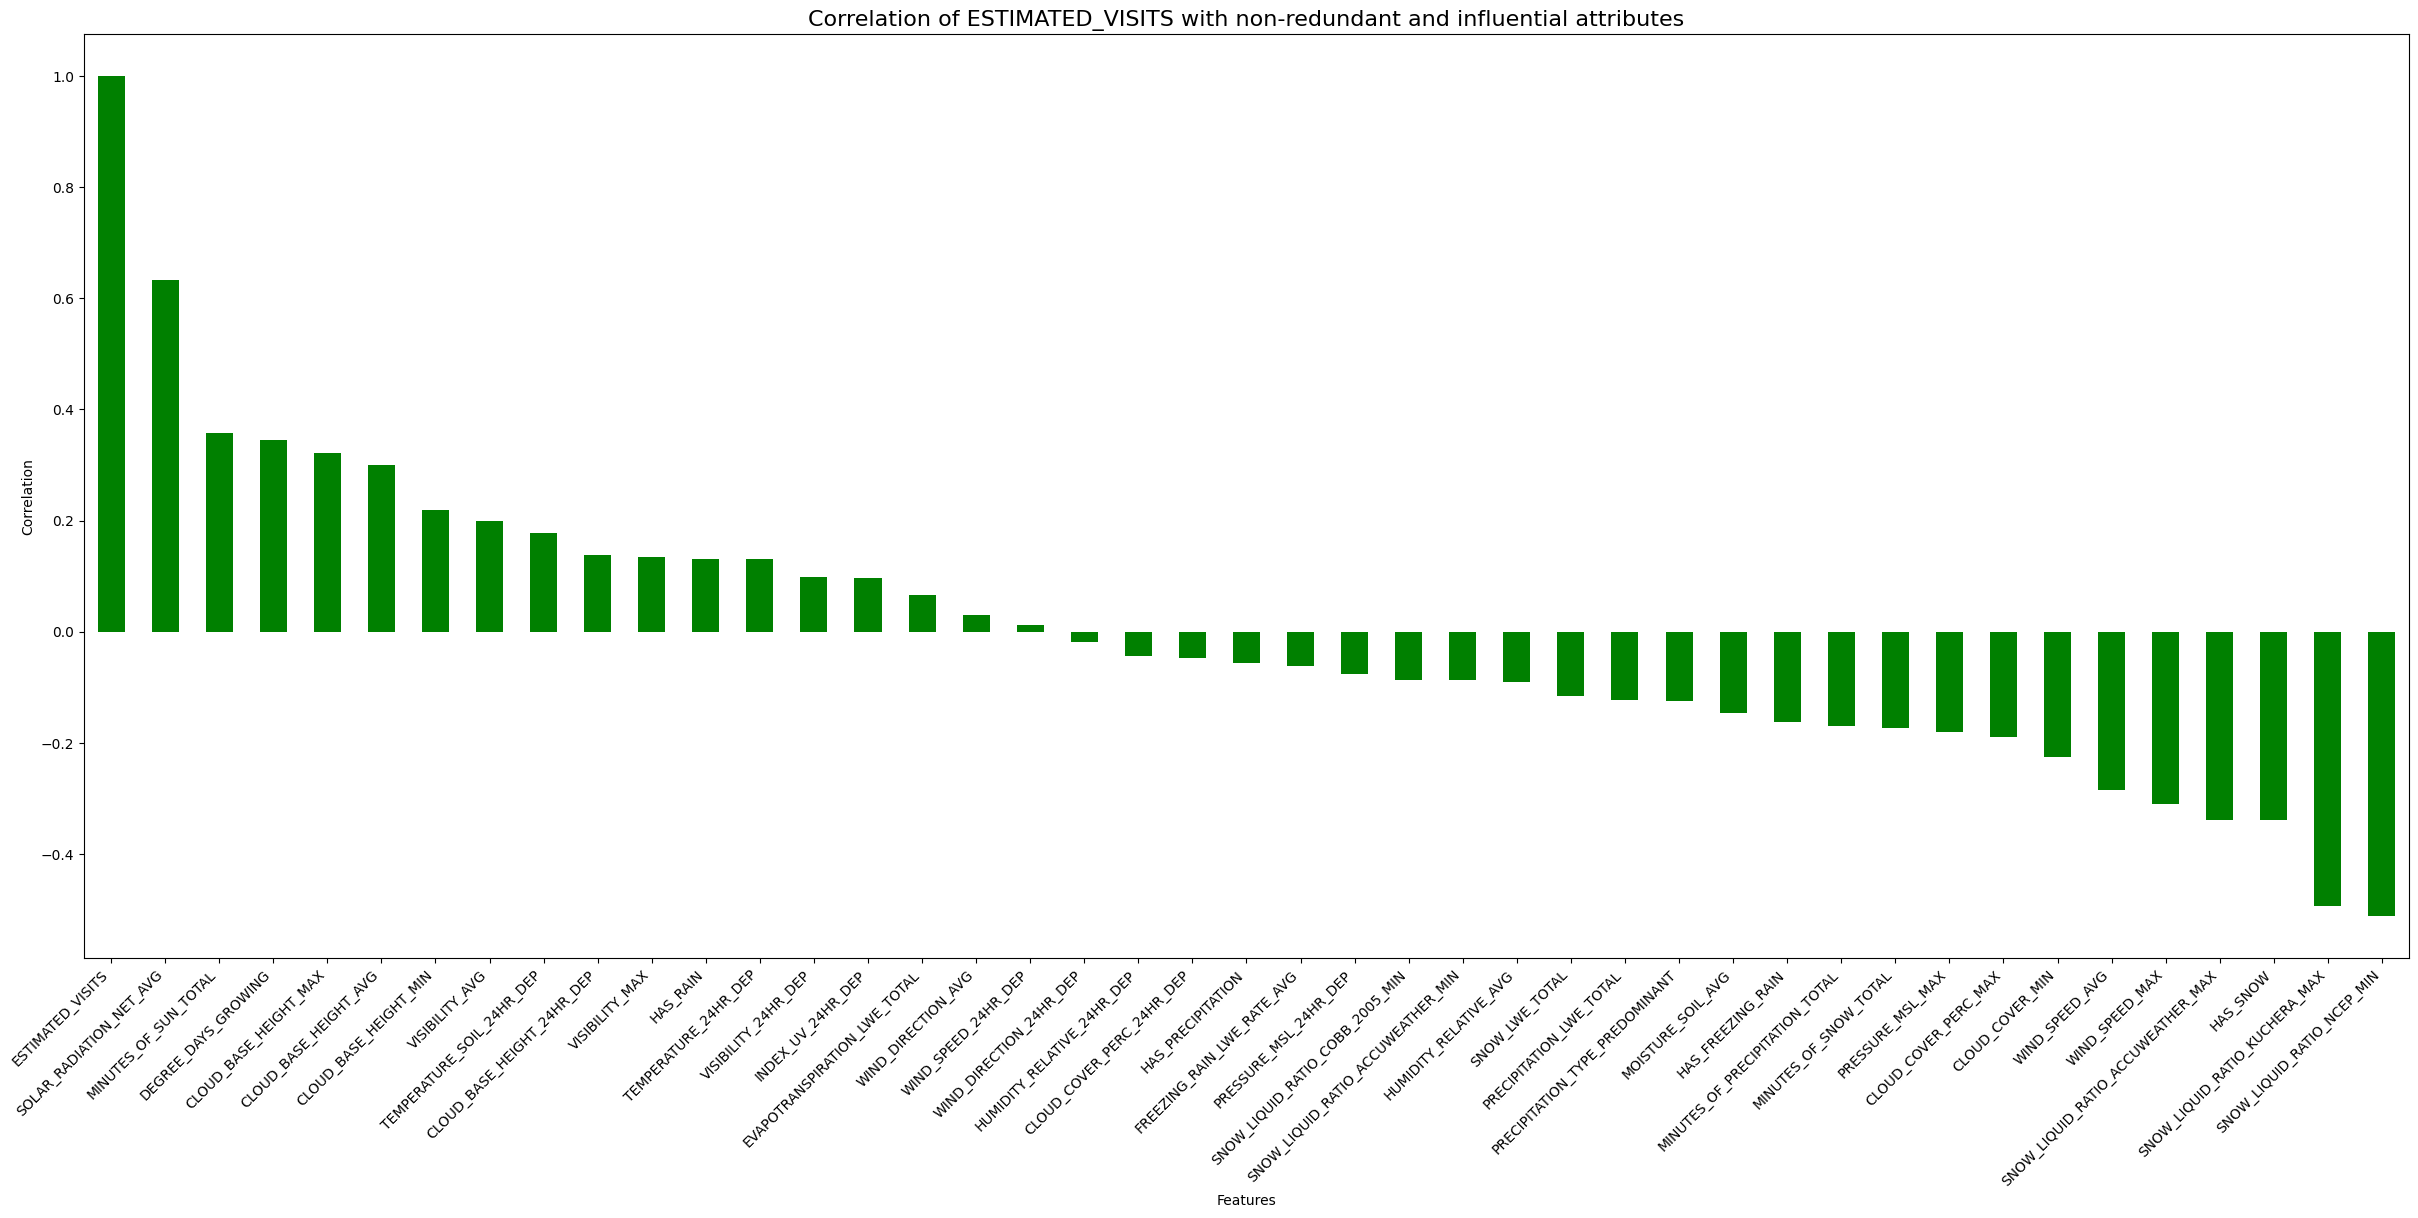

In [46]:
# let's visualize correlations again
corr_matrix = park.corr()

plt.figure(figsize=(30, 12))
corr_matrix["ESTIMATED_VISITS"].sort_values(ascending=False).plot(kind="bar", color="green")
plt.title("Correlation of ESTIMATED_VISITS with non-redundant and influential attributes", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha="right")
plt.show()

#### <span style='color:FireBrick;'> **FINDINGS!** </span>

#### <span style='color:FireBrick;'> People visit the park a lot more on sunny days! It was expected :D </span>
#### <span style='color:FireBrick;'> And people are reluctant to go for a walk when it's windy, rainy, and snowy.  </span>

## 5. Automating preprocessing using pipelines

In [47]:
park_target = park.pop("ESTIMATED_VISITS") # separate target feature

In [48]:
cols.remove("ESTIMATED_VISITS") # ESTIMATED_VISITS is the target feature, so it should be dropped from features

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat_attribs = ["HAS_FREEZING_RAIN", "HAS_RAIN", "HAS_PRECIPITATION", "HAS_SNOW"]
num_attribs = [col for col in cols if col not in cat_attribs]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # handling missing value, using median strategy
        ('std_scaler', StandardScaler()), # feature scaling, using standardization strategy
    ])

preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

In [50]:
# Great! We have a preprocessing pipeline that takes the full dataset and applies the appropriate transformations to each column.

## 6. Select and train models

### 6.1 Linear regression

In [51]:
# building the model using pipeline
from sklearn.linear_model import LinearRegression

lin_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("linear_regression", LinearRegression()),
])

In [52]:
# train the model
lin_reg.fit(park_train[cols], park_target) 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['CLOUD_COVER_PERC_24HR_DEP',
                                                   'MINUTES_OF_SUN_TOTAL',
                                                   'CLOUD_COVER_PERC_MAX',
                                                   'CLOUD_COVER_MIN',
                                                   'DEGREE_DAYS_GROWING',
                                                   'SNOW_LIQUID_RATIO_NCEP_MIN',
                                                   'SNOW_LIQUID_RATIO_KUCHERA_MAX',
                                                   'FREEZI...
                                                   'TEMPERATURE_24HR_DEP',
                                                   'VISIBILITY_AVG',
                                                   'WIND_SPEED_MAX',
                                                   'WIND_SPEED_AVG',
                                                   'EVAPOTRANSPIRATION_LWE_TOTAL',
                                                   'WIND_SPEED_24HR_DEP',
                                                   'VISIBILITY_24HR_DEP',
                                                   'CLOUD_BASE_HEIGHT_MIN',
                                                   'INDEX_UV_24HR_DEP',
                                                   'HUMIDITY_RELATIVE_24HR_DEP', ...]),
                                                 ('cat', OrdinalEncoder(),
                                                  ['HAS_FREEZING_RAIN',
                                                   'HAS_RAIN',
                                                   'HAS_PRECIPITATION',
                                                   'HAS_SNOW'])])),
                ('linear_regression', LinearRegression())])

In [53]:
lin_predictions = lin_reg.predict(park_train[cols])
print(f'some predicted values:{lin_predictions[:5].round(-2)} \nand they actual values: {park_target.iloc[:5].values}')

some predicted values:[2200. 1600. 1500. 6700. 3900.] 
and they actual values: [3993. 1051. 1577. 4211. 3730.]


In [54]:
# calculate evaluation metric using RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(park_target, lin_predictions)
lin_rmse = np.sqrt(mse)
lin_rmse

1414.9237317167622

#### <span style='color:FireBrick;'> Root Mean Squared Error (RMSE) of 1414.9? </span>
#### <span style='color:FireBrick;'> Good. verify the evaluation of the model using Cross-Validation! and then a more powerful model</span>

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, park_train[cols], park_target, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([1206.23493675, 1791.39020831, 1411.46989825, 1485.27230322,
       1108.84948889, 2802.34440469, 1506.90108612, 1583.86452653,
       1335.95843519, 1597.61063565])

In [56]:
# check the result in more details
def display_scores(scores):
  print(f"scores:{scores}")
  print(f"mean:{scores.mean()}")
  print(f"standard deviation:{scores.std()}")

display_scores(lin_rmse_scores)

scores:[1206.23493675 1791.39020831 1411.46989825 1485.27230322 1108.84948889
 2802.34440469 1506.90108612 1583.86452653 1335.95843519 1597.61063565]
mean:1582.9895923595973
standard deviation:447.5495448762593


### 6.2 Decision tree regression

In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("tree_regression", DecisionTreeRegressor()),
])

In [58]:
# train the model
tree_reg.fit(park_train[cols], park_target) 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['CLOUD_COVER_PERC_24HR_DEP',
                                                   'MINUTES_OF_SUN_TOTAL',
                                                   'CLOUD_COVER_PERC_MAX',
                                                   'CLOUD_COVER_MIN',
                                                   'DEGREE_DAYS_GROWING',
                                                   'SNOW_LIQUID_RATIO_NCEP_MIN',
                                                   'SNOW_LIQUID_RATIO_KUCHERA_MAX',
                                                   'FREEZI...
                                                   'TEMPERATURE_24HR_DEP',
                                                   'VISIBILITY_AVG',
                                                   'WIND_SPEED_MAX',
                                                   'WIND_SPEED_AVG',
                                                   'EVAPOTRANSPIRATION_LWE_TOTAL',
                                                   'WIND_SPEED_24HR_DEP',
                                                   'VISIBILITY_24HR_DEP',
                                                   'CLOUD_BASE_HEIGHT_MIN',
                                                   'INDEX_UV_24HR_DEP',
                                                   'HUMIDITY_RELATIVE_24HR_DEP', ...]),
                                                 ('cat', OrdinalEncoder(),
                                                  ['HAS_FREEZING_RAIN',
                                                   'HAS_RAIN',
                                                   'HAS_PRECIPITATION',
                                                   'HAS_SNOW'])])),
                ('tree_regression', DecisionTreeRegressor())])

In [59]:
dt_predictions = tree_reg.predict(park_train[cols])
print(f'some predicted values:{dt_predictions[:5].round(-2)} \nand they actual values: {park_target.iloc[:5].values}')

some predicted values:[4000. 1100. 1600. 4200. 3700.] 
and they actual values: [3993. 1051. 1577. 4211. 3730.]


In [60]:
# let's calculate rmse for this model

mse = mean_squared_error(park_target, dt_predictions)
tree_rmse = np.sqrt(mse)
tree_rmse

0.0

#### <span style='color:FireBrick;'>  what?? the model has no error?? </span>
#### <span style='color:FireBrick;'> it's not possible. the model is badly overfitting! </span>
#### <span style='color:FireBrick;'> let's use Cross-Validation to evaluate the performance </span>

In [61]:
scores = cross_val_score(tree_reg, park_train[cols], park_target, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([2278.85640179, 2816.39580144, 2154.97299767, 2799.29312506,
       1883.57493008, 3190.23495514, 2319.42641542, 1893.19449062,
       3069.82199866, 2652.06087723])

In [62]:
# check the result in more details
def display_scores(scores):
  print(f"scores:{scores}")
  print(f"mean:{scores.mean()}")
  print(f"standard deviation:{scores.std()}")

display_scores(tree_rmse_scores)

scores:[2278.85640179 2816.39580144 2154.97299767 2799.29312506 1883.57493008
 3190.23495514 2319.42641542 1893.19449062 3069.82199866 2652.06087723]
mean:2505.7831993110435
standard deviation:442.9830553879657


#### <span style='color:FireBrick;'>  correct! the model is badly overfitting. </span>
#### <span style='color:FireBrick;'>  in fact the performance of the tree regression model is worse than linear regression. RMSE is 2505. </span>

### 6.3 Random forest  regression 

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor()),
])

In [64]:
# train the model
rf_reg.fit(park_train[cols], park_target) 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['CLOUD_COVER_PERC_24HR_DEP',
                                                   'MINUTES_OF_SUN_TOTAL',
                                                   'CLOUD_COVER_PERC_MAX',
                                                   'CLOUD_COVER_MIN',
                                                   'DEGREE_DAYS_GROWING',
                                                   'SNOW_LIQUID_RATIO_NCEP_MIN',
                                                   'SNOW_LIQUID_RATIO_KUCHERA_MAX',
                                                   'FREEZI...
                                                   'TEMPERATURE_24HR_DEP',
                                                   'VISIBILITY_AVG',
                                                   'WIND_SPEED_MAX',
                                                   'WIND_SPEED_AVG',
                                                   'EVAPOTRANSPIRATION_LWE_TOTAL',
                                                   'WIND_SPEED_24HR_DEP',
                                                   'VISIBILITY_24HR_DEP',
                                                   'CLOUD_BASE_HEIGHT_MIN',
                                                   'INDEX_UV_24HR_DEP',
                                                   'HUMIDITY_RELATIVE_24HR_DEP', ...]),
                                                 ('cat', OrdinalEncoder(),
                                                  ['HAS_FREEZING_RAIN',
                                                   'HAS_RAIN',
                                                   'HAS_PRECIPITATION',
                                                   'HAS_SNOW'])])),
                ('random_forest', RandomForestRegressor())])

In [65]:
rf_predictions = rf_reg.predict(park_train[cols])
rf_mse = mean_squared_error(park_target, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

616.1738704311161

#### <span style='color:FireBrick;'> **WOW** </span>
#### <span style='color:FireBrick;'> **the root mean squared error (RMSE) of 616 demonstrates good performance in the random forest regression model!!** </span>

In [66]:
# verify the evaluation of the model using Cross-Validation!

scores = cross_val_score(rf_reg, park_train[cols], park_target, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
rf_rmse_scores

array([1348.71234014, 1722.8032028 , 1550.61860239, 1405.4526712 ,
       1154.46544377, 2773.58516378, 1349.05387309, 1396.52080544,
       1443.05215178, 1636.62846684])

In [67]:
# check the result in more details
def display_scores(scores):
  print(f"scores:{scores}")
  print(f"mean:{scores.mean()}")
  print(f"standard deviation:{scores.std()}")

display_scores(rf_rmse_scores)

scores:[1348.71234014 1722.8032028  1550.61860239 1405.4526712  1154.46544377
 2773.58516378 1349.05387309 1396.52080544 1443.05215178 1636.62846684]
mean:1578.0892721233195
standard deviation:426.5990729626747


#### <span style='color:FireBrick;'> **Good!** </span>

## 7. Fine-tune models

In [68]:
# fine-tune the performace model, random forest

from sklearn.model_selection import GridSearchCV

rf_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
]) # building the model using pipeline

param_grid = [
    {'random_forest__n_estimators': [10, 30, 50], 'random_forest__max_features': [6, 8, 10]},
    {'random_forest__bootstrap': [False], 'random_forest__n_estimators': [10, 30], 'random_forest__max_features': [4, 6, 8]},
  ] # a list of random forest model hyperparameters

rf_grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [69]:
# train random forest regression model with all combinations of hyperparameters
# 15 different model, each train 5 times, makes it 75 rounds of training!
rf_grid_search.fit(park_train[cols], park_target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['CLOUD_COVER_PERC_24HR_DEP',
                                                                          'MINUTES_OF_SUN_TOTAL',
                                                                          'CLOUD_COVER_PERC_MAX',
                                                                          'CLOUD_COVER_MIN',
                                                                          'DEGREE_DAYS_GROWING',
                                                                          'SNOW_LIQUID_RATIO_NCEP_MIN',
                                                                          'SNOW_LIQUI...
                                                                         ['HAS_FREEZING_RAIN',
                                                                          'HAS_RAIN',
                                                                          'HAS_PRECIPITATION',
                                                                          'HAS_SNOW'])])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [6, 8, 10],
                          'random_forest__n_estimators': [10, 30, 50]},
                         {'random_forest__bootstrap': [False],
                          'random_forest__max_features': [4, 6, 8],
                          'random_forest__n_estimators': [10, 30]}],
             scoring='neg_mean_squared_error')

In [71]:
# the evaluation scores
cvres = rf_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

1670.7354080842415 {'random_forest__max_features': 6, 'random_forest__n_estimators': 10}
1558.1090765252018 {'random_forest__max_features': 6, 'random_forest__n_estimators': 30}
1555.7545904506408 {'random_forest__max_features': 6, 'random_forest__n_estimators': 50}
1678.410833350198 {'random_forest__max_features': 8, 'random_forest__n_estimators': 10}
1604.366221040931 {'random_forest__max_features': 8, 'random_forest__n_estimators': 30}
1583.974770670121 {'random_forest__max_features': 8, 'random_forest__n_estimators': 50}
1700.1091349981475 {'random_forest__max_features': 10, 'random_forest__n_estimators': 10}
1637.9081539464903 {'random_forest__max_features': 10, 'random_forest__n_estimators': 30}
1595.1389400534026 {'random_forest__max_features': 10, 'random_forest__n_estimators': 50}
1736.5185141635343 {'random_forest__bootstrap': False, 'random_forest__max_features': 4, 'random_forest__n_estimators': 10}
1614.5728268384412 {'random_forest__bootstrap': False, 'random_forest__max_

#### <span style='color:FireBrick;'> Fine-tuned the random forest, which was the best model to have a better performance </span>
#### <span style='color:FireBrick;'> The hyperparameters are {'random_forest__max_features': 6, 'random_forest__n_estimators': 50} </span>

## 8. Evaluate the model on the test set

In [72]:
test_target = test.pop("ESTIMATED_VISITS") # separate actual values

In [73]:
final_model = rf_grid_search.best_estimator_ # the previously fine-tuned model
test_prediction = final_model.predict(test[cols]) 
mse = mean_squared_error(test_target, test_prediction)
rmse = np.sqrt(mse)
print(f'evaluation metric for unseen data: {rmse}')

evaluation metric for unseen data: 1656.5993280459195


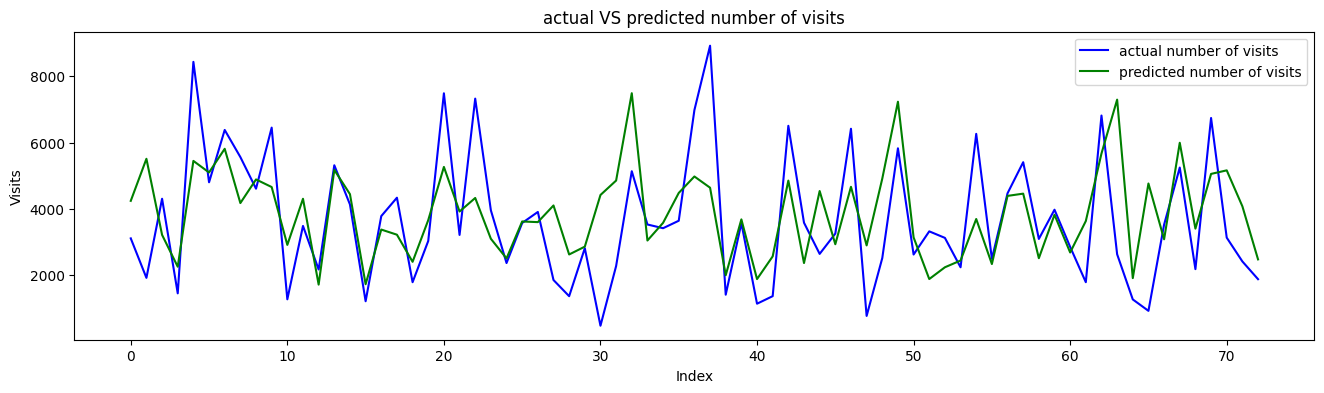

In [74]:
plt.figure(figsize=(16, 4))
xs = range(len(test_target))

plt.plot(xs, test_target, color='blue', label="actual number of visits")
plt.plot(xs, test_prediction, color='green', label="predicted number of visits")
plt.title("actual VS predicted number of visits")
plt.xlabel("Index")
plt.ylabel("Visits")
plt.legend(loc="best")

plt.show()

## 9. Predict the number of visits 

In [75]:
# if categorical features of the weather dataset contain NAN values, they will cause a problem in the preprocessing pipeline
nan_counts = weather.isna().sum()
nan_columns2 = nan_counts[nan_counts >= 1].index.tolist()
for feature in nan_columns2:
    if (feature in cols) and (feature in cat_attribs):
        print(feature)

HAS_FREEZING_RAIN
HAS_RAIN


In [76]:
nan_rows = weather[weather['HAS_FREEZING_RAIN'].isna() | weather['HAS_RAIN'].isna()].index
len(nan_rows)
# these 164 rows will be droped 

164

In [77]:
weather.drop(index=nan_rows, inplace=True)
weather.shape
# now the weather dataset would be for 568 days

(568, 166)

In [78]:
# should also drop from days to maintain the integrity
days_unestimated_visits.drop(index=nan_rows, inplace=True)

In [79]:
# Good! 

In [80]:
visit_prediction = final_model.predict(weather[cols]) 

## 10. Visualize the prediction!


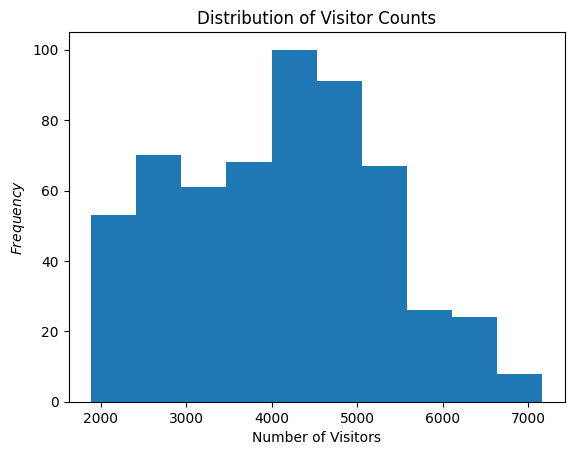

In [81]:
# histogram

plt.hist(visit_prediction)
plt.title("Distribution of Visitor Counts")  
plt.xlabel("Number of Visitors")  
plt.ylabel("$Frequency$")  
plt.show()

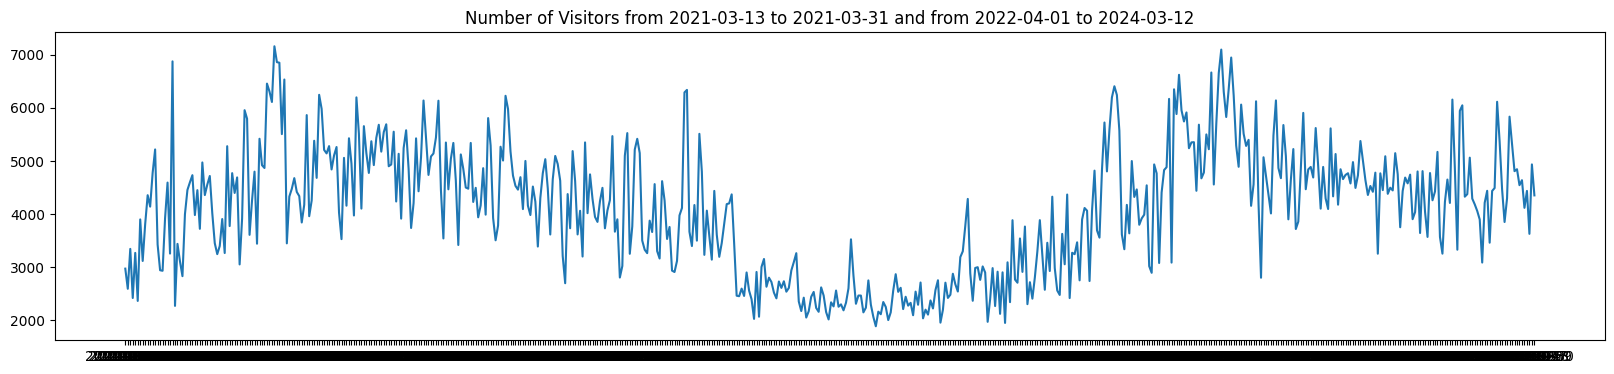

In [82]:
# time series

plt.figure(figsize=(20, 4))
plt.plot(days_unestimated_visits, visit_prediction)
plt.title("Number of Visitors from 2021-03-13 to 2021-03-31 and from 2022-04-01 to 2024-03-12")  
plt.show()

In [83]:
# which day park has the maximum visits
ind = [ind for ind, value in enumerate(visit_prediction) if value == max(visit_prediction)][0]
day_max_visit = days_unestimated_visits.values[ind]

# which day park has the mimum visits
ind = [ind for ind, value in enumerate(visit_prediction) if value == min(visit_prediction)][0]
day_min_visit = days_unestimated_visits.values[ind]

print(f"on {day_max_visit}, park will have a maximum visit of {max(visit_prediction)} \non {day_min_visit}, park will have a minimum visit of {min(visit_prediction)}")

on 2022-05-11, park will have a maximum visit of 7160.44 
on 2023-01-08, park will have a minimum visit of 1887.7


### <span style='color:DarkViolet;'> The 11th of May, a perfect spring day with lots of sunshine, brings people to enjoy walking, playing, laughing, and spending time with puppies </span>

### <span style='color:DarkViolet;'> 08th of January, it's cold! :D </span>